# Imports

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import math
import operator

### Creating an instance of the dataset and getting the data

In [13]:
iris_dataset = load_iris()

**Getting the data's info**

In [14]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Feature Names**

In [17]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Data set**

In [18]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
iris_dataset.data.shape

(150, 4)

**Labels or Targets**

In [21]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris_dataset.target.shape

(150,)

# Creating a DataFrame of the data

In [23]:
df_raw = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [24]:
df_raw

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
df_raw.shape

(150, 4)

In [28]:
df_raw.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing the data 

In [31]:
# Checking for null values

df_raw.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**So no null value is in the dataset**

# Visualization

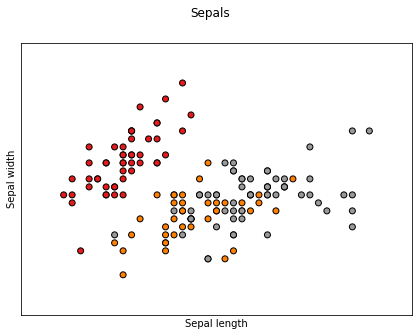

<Figure size 432x288 with 0 Axes>

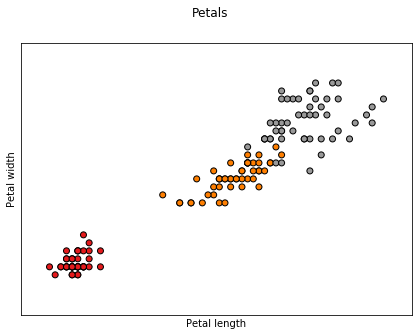

<Figure size 432x288 with 0 Axes>

In [32]:
X = iris_dataset.data[:, :2]  # we only take the first two features.
y = iris_dataset.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(7, 5))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.suptitle('Sepals')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.figure()

plt.show()


X = iris_dataset.data[:, 2:4]  # we only take the first two features.
y = iris_dataset.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(7, 5))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.suptitle('Petals')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.figure()

plt.show()

# Separating the training and testing data

In [33]:
x = df_raw
y = iris_dataset.target

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


# Using the prebuilt KNN model from Sci-kit Learn

**Creating an object of the KNeighboursClassifier class**

In [267]:
# neighbor's should be equal to the square root of the data and always should be odd.
knn = KNeighborsClassifier(n_neighbors=5, p=5, metric='euclidean')


In [268]:
# Fitting the data to the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=5,
                     weights='uniform')

In [269]:
# Model Evaluation for training set

Y_train_predict = knn.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)

print('R2 score is {}'.format(r2))

R2 score is 0.9701447977310046


In [270]:
# Model Evaluation for the testing set

Y_test_predict = knn.predict(X_test)
r2 = r2_score(Y_test, Y_test_predict)

print('R2 score is {}'.format(r2))

R2 score is 0.9696785930867192


# Creating our model from the scratch

In [271]:
class KNN:
    
    # Initilizing the constructor which takes in the number of neighbours arguament
    def __init__(self, neighbors = 5):
        self.neighbors = neighbors
    
    # Creating a euclidean distance method which is private and used inside the function only
    def __Euclidean_distance(self, first_instance, second_instance, length):
        distance = 0
        for x in range(length):
            distance += pow((first_instance[x] - second_instance[x]), 2)
        return math.sqrt(distance)
    
    # Creating a method to fit the data in the model
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    # Predicting the values of the test instances
    def predict(self, X_test):
        X_prediction = list()
        for i in range(len(X_test)):
            temp = list()
            for j in range(len(self.x)):
                dist = Euclidean_distance(X_test.iloc[i], self.x.iloc[j], X_test.shape[1])
                temp.append((self.y[j], dist))
            temp.sort(key=operator.itemgetter(1))
            
            temp2 = list()
            
            for k in range(self.neighbors):
                temp2.append(temp[:self.neighbors][k][0])
            
            X_prediction.append(max(set(temp2), key=temp2.count))
        
        return np.array(X_prediction)

In [297]:
# Creating an object of our KNN class
obj = KNN(neighbors=5)

In [298]:
# Fitting the data to our class

obj.fit(X_train, Y_train)

In [299]:
# Model Evaluation for training set

Y_train_predict = obj.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)

print('R2 score is {}'.format(r2))

R2 score is 0.9701447977310046


In [300]:
# Model Evaluation for the testing set

Y_test_predict = obj.predict(X_test)
r2 = r2_score(Y_test, Y_test_predict)

print('R2 score is {}'.format(r2))

R2 score is 0.9696785930867192


## So we can see that our model works fine too just like the Pre-made model in SKLearn.